In [109]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as fft
import pandas as pd
import datetime as dt

In [110]:
x = pd.read_csv('Train.csv')

# b)Ce interval de timp acopera esantioanele din fisier?
time = x['Datetime']
first = dt.datetime.strptime(time[0],'%d-%m-%Y %H:%M')
last = dt.datetime.strptime(time[len(time)-1],'%d-%m-%Y %H:%M')
time_interval =  (last - first)
print(f'Inetervalul de timp ce acopera esantionele este : {time_interval}')
# a) Care este frecventa de esantionare a semnalului din Train.csv (revedeti sectiunea pentru detalii despre cum a fost achizitionat acesta)?
samples =  x['Count']
N = len(samples)
frecv_esantionare = N/time_interval.days
print(f'Frecventa esantionare este: {frecv_esantionare}')

Inetervalul de timp ce acopera esantionele este : 761 days, 23:00:00
Frecventa esantionare este: 24.031537450722734


In [111]:
#c) Considerand ca semnalul a fost esantionat corect(fara aliere) si optim, care este frecventa maxima prezenta in semnal?
# Conform teoremei Nyquist frecventa de esanionare trebuie sa fie de 2 ori mai mare decat frecventa maxima a semnalului
frecv_max  = frecv_esantionare / 2
print(f'Frecventa maxima este: {frecv_max}')

Frecventa maxima este: 12.015768725361367


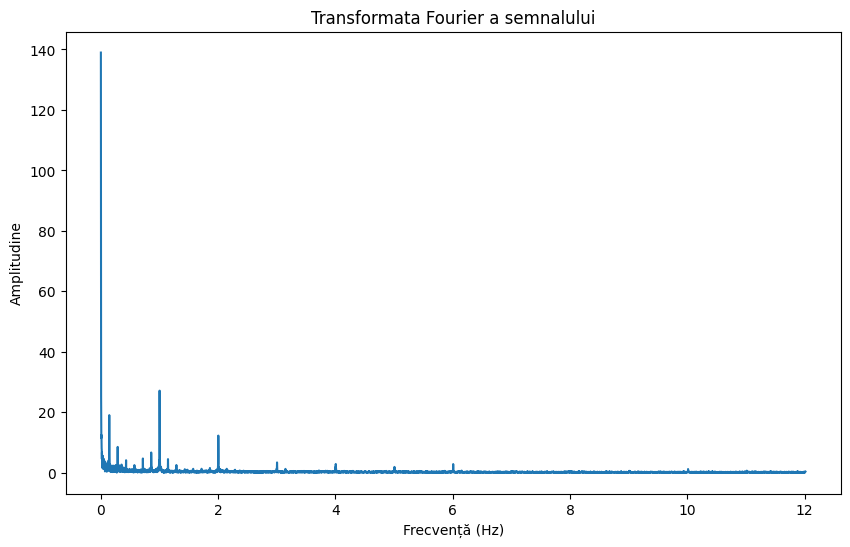

In [112]:
# d) Utilizati functia np.fft.fft(x) pentru a calcula transformata Fourier
# a semnalului si afisati grafic modulul transformatei.
# Deoarece valorile pe care le veti calcula suntin Hz, este important
# sa definiti corectfrecventa de esantionare (astfel incatvalorile de
# frecvente pe care le obtineti utilizand ultima secventa de cod din
# Sectiunea 3 sa aiba interpretare corecta din punctde vedere fizic).


fourier_tr = fft.fft(samples)
# normalizarea si pastrarea a jumatate din spectru datorita simetriei
fourier_tr = np.abs(fourier_tr/N)[:N//2]
f = frecv_esantionare/N  * np.linspace(0, N / 2, N // 2)


plt.figure(figsize=(10, 6))
plt.plot(f, fourier_tr)
plt.title('Transformata Fourier a semnalului')
plt.xlabel('Frecvență (Hz)')
plt.ylabel('Amplitudine')
plt.savefig("grafice/Transformata_Fourier_semnalului.pdf", format="pdf")
plt.savefig("grafice/Transformata_Fourier_semnalului.png", format="png")
plt.show()

Eliminare componenta continua: 138.95811461067368


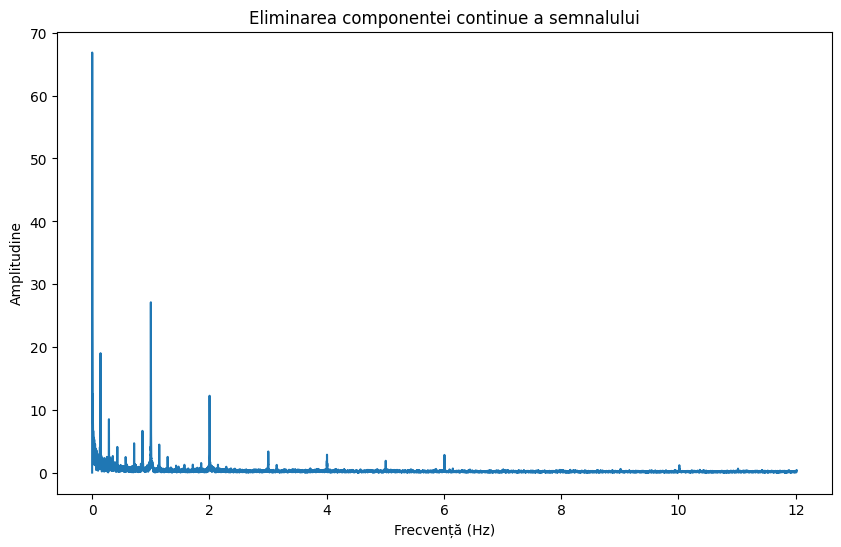

In [113]:
# e) Prezinta acest semnal o componenta continua? Daca da, eliminati-o.

# Dacă există un vârf la frecvența zero, atunci semnalul conține o componentă continuă.
componenta_continua = fourier_tr[0]
new_signal = samples - componenta_continua
print(f"Eliminare componenta continua: {componenta_continua}")
# recalculare
fourier_tr = fft.fft(new_signal)
fourier_tr = np.abs(fourier_tr/N)[:N//2]
f = frecv_esantionare/N  * np.linspace(0, N / 2, N // 2)

plt.figure(figsize=(10, 6))
plt.plot(f, fourier_tr)
plt.title('Eliminarea componentei continue a semnalului')
plt.xlabel('Frecvență (Hz)')
plt.ylabel('Amplitudine')
plt.savefig("grafice/Eliminarea_componentei_continue_a_semnalului.pdf", format="pdf")
plt.savefig("grafice/Eliminarea_componentei_continue_a_semnalului.png", format="png")
plt.show()

In [114]:
# f)Care sunt frecventele principale continute in semnal, asa cum apar ele
# in transformata Fourier? Mai exact determinati primele 4 cele mai
# mari valori ale modulului transformatei si specificati caror frecvente
# (in Hz) le corespund. Caror fenomene periodice din semnal se asociaz
# a fiecare?

patru_maxime = np.argsort(fourier_tr)[-4:]
frecvente_maxime = f[patru_maxime]
print(frecvente_maxime)

[0.00394261 1.00142358 0.00262841 0.0013142 ]


1.00142358 -> 1 data pe zi

0.00394261 -> o data la 333 de zile ?

0.00262841 -> o data la 380 de zile aprox 1 an

0.0013142  -> o data la 760 de zile aprox de 2 ori pe an 

C:\Users\Katherine\AppData\Local\Temp\ipykernel_23040\2484717915.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_luna_trafic['Datetime'] = pd.to_datetime(subset_luna_trafic['Datetime'], format='%d-%m-%Y %H:%M')


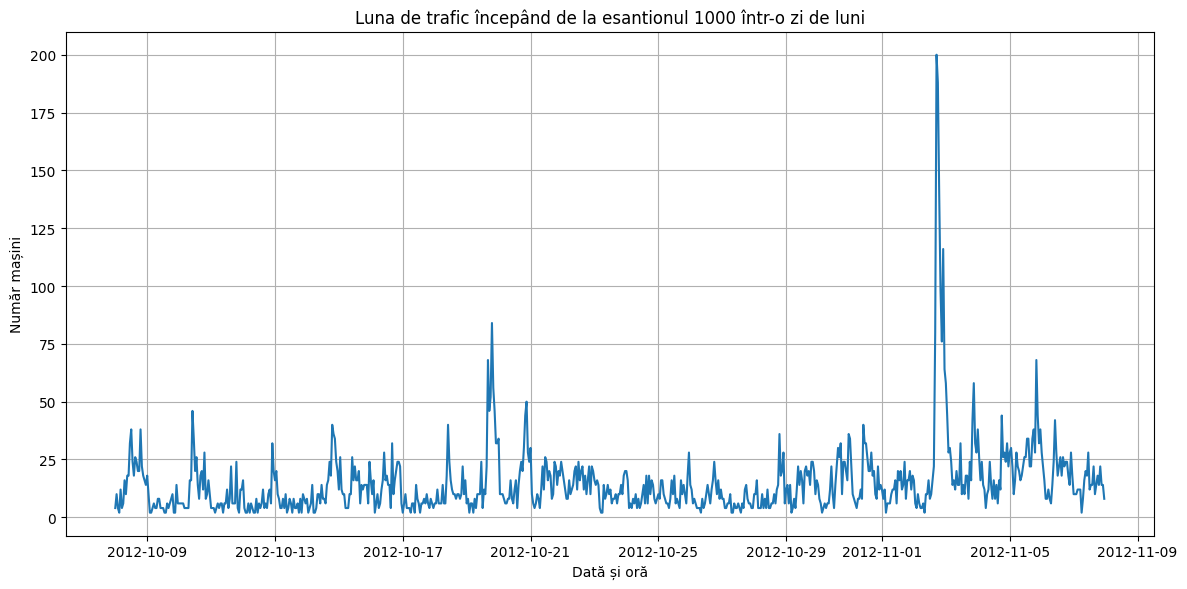

In [115]:
# g) Incepand de la esantion ales de voi mai mare decat 1000, vizualizati,
# pe un grafic separat o luna de trafic. Alegeti esantionul de start
# astfel incat reprezentarea sa inceapa intr-o zi de luni.
start_index = 1000
# weekday = >  0 = Monday
while start_index < len(x) and dt.datetime.strptime(x['Datetime'][start_index], '%d-%m-%Y %H:%M').weekday() != 0:
    start_index += 1

# Crearea unui sub-set de date pentru luna de trafic
# 1 luna = 31 de zile 
# esantioanele sunt luate pe ore deci o zi are 24 de esantioane
subset_luna_trafic = x[start_index:start_index + 31 * 24]

# Convertire coloana Datetime în tip de dată
subset_luna_trafic['Datetime'] = pd.to_datetime(subset_luna_trafic['Datetime'], format='%d-%m-%Y %H:%M')
# print(subset_luna_trafic['Datetime'])
plt.figure(figsize=(12, 6))
plt.plot(subset_luna_trafic['Datetime'], subset_luna_trafic['Count'])
plt.title('Luna de trafic începând de la esantionul 1000 într-o zi de luni')
plt.xlabel('Dată și oră')
plt.ylabel('Număr mașini')
plt.grid(True)
plt.tight_layout()
plt.savefig("grafice/Luna_trafic.pdf", format="pdf")
plt.savefig("grafice/Luna_trafic.png", format="png")
plt.show()

h) Nu se cunoaste data la care a inceput masurarea acestui semnal.\
Concepeti o metoda (descrieti in cuvinte) prin care sa determinati,\
doar analizand semnalul in timp, aceasta data. 

Incercam sa gasim o functie care sa aproximeze semnalul nostru pe care o notam cu f.\
Stim ce valoare are fuctia in data curenta (data o vom nota cu x).\
Avand funtia care aporximeaza acest semnal, vom incerca sa prezicem valori pana vom ajunge cu o valoare apropiata de f(x).\
Notam cu n numarul de valori generate pana s-a ajuns la valoarea f(x).\
Deci data la care incepe masuratoare va fi x - n.



In [116]:
# subset_luna_trafic = x[start_index:start_index + 31 * 24]

# # Convertire coloana Datetime în tip de dată
# subset_luna_trafic['Datetime'] = pd.to_datetime(subset_luna_trafic['Datetime'], format='%d-%m-%Y %H:%M')
# # print(subset_luna_trafic['Datetime'])
# plt.figure(figsize=(12, 6))
# plt.plot( subset_luna_trafic['Count'])

# subset_luna_trafic = x[start_index + 31*24:start_index + 2*31 * 24]
# subset_luna_trafic['Datetime'] = pd.to_datetime(subset_luna_trafic['Datetime'], format='%d-%m-%Y %H:%M')

# plt.plot( subset_luna_trafic['Count'])

# subset_luna_trafic = x[start_index + 2*31*24:start_index + 3*31 * 24]
# subset_luna_trafic['Datetime'] = pd.to_datetime(subset_luna_trafic['Datetime'], format='%d-%m-%Y %H:%M')

# plt.plot( subset_luna_trafic['Count'])

# subset_luna_trafic = x[start_index + 3*31*24:start_index + 4*31 * 24]
# subset_luna_trafic['Datetime'] = pd.to_datetime(subset_luna_trafic['Datetime'], format='%d-%m-%Y %H:%M')

# plt.plot( subset_luna_trafic['Count'])

# plt.grid(True)
# plt.tight_layout()
# plt.show()

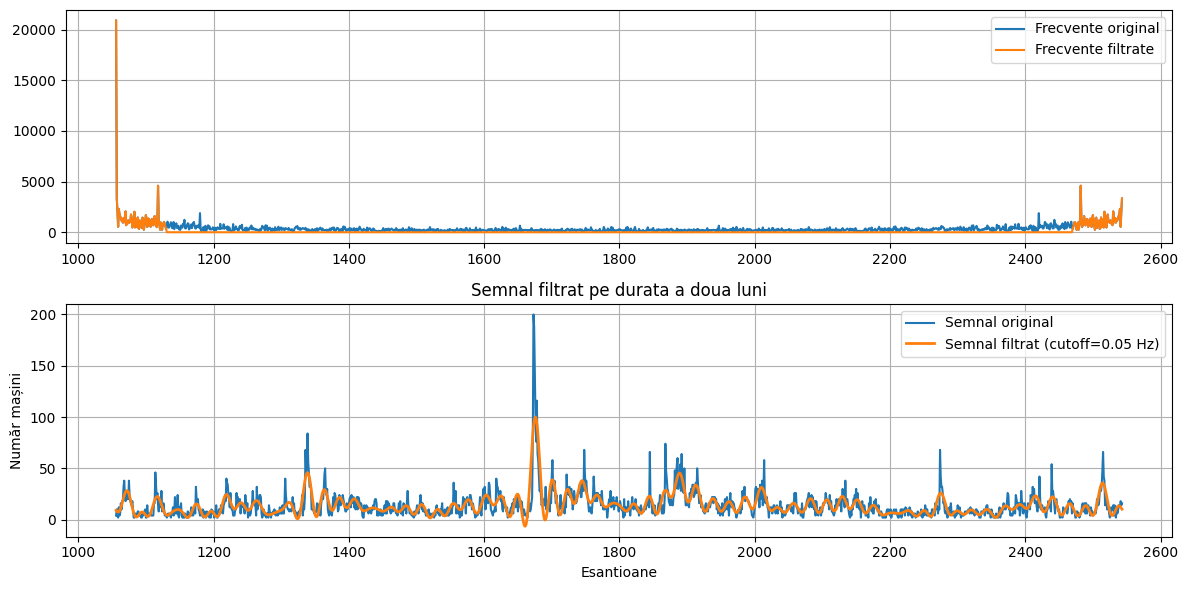

In [117]:
nr_luni = 2 * 31 * 24
# Calculează transformata Fourier
samples = x[start_index:start_index + nr_luni]

samples = samples['Count']
N = len(samples)
t =  range(start_index,start_index+nr_luni)

frequencies = np.abs(fft.fftfreq(N))
fft_values = fft.fft(samples)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, np.abs(fft_values), label='Frecvente original')

# setez la zero coeficienții Fourier pentru frecvențe înalte 
cutoff_frequency = 0.05
high_freq_indices = np.where(frequencies > cutoff_frequency)[0]
fft_values[high_freq_indices] = 0

plt.plot(t, np.abs(fft_values), label='Frecvente filtrate')
plt.legend() 
plt.grid(True)

# calculez inversa transformata Fourier
filtered_signal = fft.ifft(fft_values)

plt.subplot(2, 1, 2)
plt.plot( t,samples, label='Semnal original')
plt.plot( t,np.real(filtered_signal), label=f'Semnal filtrat (cutoff={cutoff_frequency} Hz)', linewidth=2)
plt.title('Semnal filtrat pe durata a doua luni')
plt.xlabel('Esantioane')
plt.ylabel('Număr mașini')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.savefig("grafice/Semnal_filtrat.pdf", format="pdf")
plt.savefig("grafice/Semnal_filtrat.png", format="png")
plt.show()
